In [44]:
import simpleaudio.functionchecks as fc
import simpleaudio as sa
from pydub import AudioSegment
from pydub.playback import play
import matplotlib.pyplot as plt
import numpy as np
from pydub.utils import get_array_type
import array
import scipy
from scipy import fft, arange
from scipy.io import wavfile
import os

from sklearn.metrics import mean_squared_error

In [45]:
fc.LeftRightCheck.run()


-- LeftRightCheck --
Checks stereo playback by first playing a note in the left channel only,
then a different note in the right channel only.

Starting check in ...
3 ...
2 ...
1 ...
RUNNING CHECK ...
... DONE


In [46]:
path = r"Notes/Audio Files/Audio 1_03.wav"
wave_obj = sa.WaveObject.from_wave_file(path)
play_obj = wave_obj.play()
play_obj.wait_done()

Simple audio checks done

In [47]:
song = AudioSegment.from_file(path, format='wav')

song = song[:9500]

SEGMENT_MS = 50

volume = [segment.dBFS for segment in song[::SEGMENT_MS]]

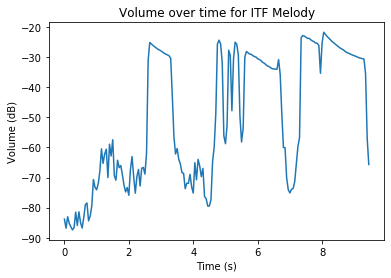

In [48]:
x_axis = np.arange(len(volume)) * (SEGMENT_MS / 1000)
plt.plot(x_axis, volume)
plt.title('Volume over time for ITF Melody')
plt.xlabel('Time (s)')
plt.ylabel('Volume (dB)')
plt.show()

In [49]:
# actual_notes = [2.639, 4.767, 5.120, 5.289, 5.618, 7.363, 8.028, 10.018, 10.346, 10.534, 11.752, 11.918, 13.088, 13.244]
actual_notes = [2.639, 4.767, 5.120, 5.289, 5.618, 7.363, 8.028]

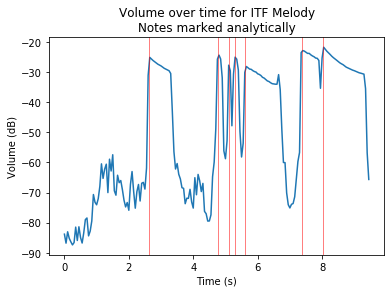

In [50]:
plt.plot(x_axis, volume)
for s in actual_notes:
    plt.axvline(x=s, color='r', linewidth=0.5, linestyle='-')
plt.title('Volume over time for ITF Melody\nNotes marked analytically')
plt.xlabel('Time (s)')
plt.ylabel('Volume (dB)')
plt.show()

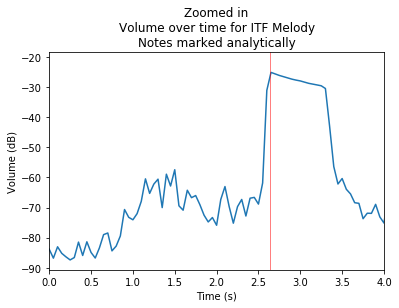

In [51]:
plt.plot(x_axis, volume)
for s in actual_notes:
    plt.axvline(x=s, color='r', linewidth=0.5, linestyle='-')
plt.title('Zoomed in\nVolume over time for ITF Melody\nNotes marked analytically')
plt.xlabel('Time (s)')
plt.ylabel('Volume (dB)')
plt.xlim(0, 4)
plt.show()

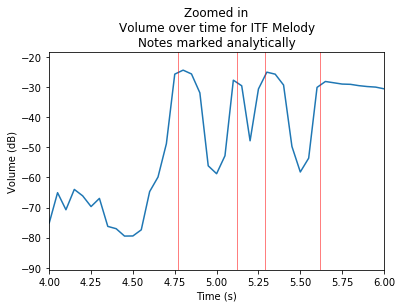

In [52]:
plt.plot(x_axis, volume)
for s in actual_notes:
    plt.axvline(x=s, color='r', linewidth=0.5, linestyle='-')
plt.title('Zoomed in\nVolume over time for ITF Melody\nNotes marked analytically')
plt.xlabel('Time (s)')
plt.ylabel('Volume (dB)')
plt.xlim(4, 6)
plt.show()

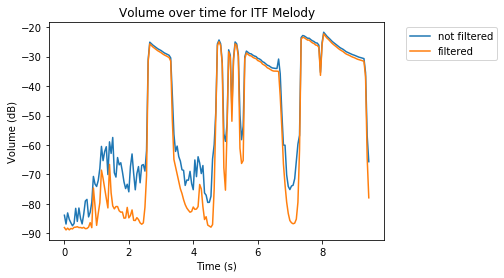

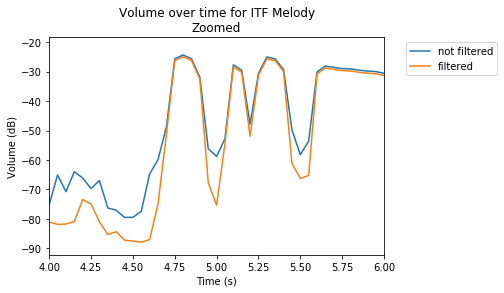

In [53]:
plt.plot(x_axis, volume, label='not filtered')

filter_song = song.high_pass_filter(120)
filter_volume = [segment.dBFS for segment in filter_song[::SEGMENT_MS]]
filter_x_axis = np.arange(len(volume)) * (SEGMENT_MS / 1000)
plt.plot(filter_x_axis, filter_volume, label='filtered')
plt.title('Volume over time for ITF Melody')
plt.xlabel('Time (s)')
plt.ylabel('Volume (dB)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

plt.plot(x_axis, volume, label='not filtered')
plt.plot(filter_x_axis, filter_volume, label='filtered')
plt.title('Volume over time for ITF Melody\nZoomed')
plt.xlabel('Time (s)')
plt.ylabel('Volume (dB)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlim(4, 6)
plt.show()

In [54]:
VOLUME_THRESHOLD = -32

EDGE_THRESHOLD = 5

predicted_starts = []
for i in range(1, len(volume)):
    if(volume[i] > VOLUME_THRESHOLD and volume[i] - volume[i-1] > EDGE_THRESHOLD):
        predicted_note = (i * SEGMENT_MS)/1000
        predicted_starts.append(predicted_note)

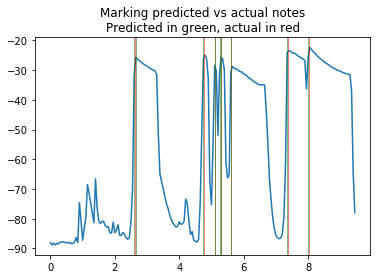

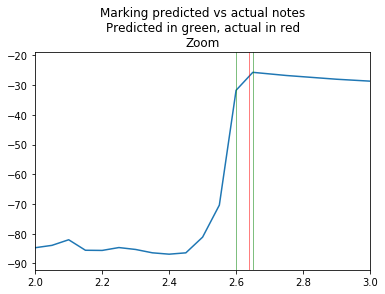

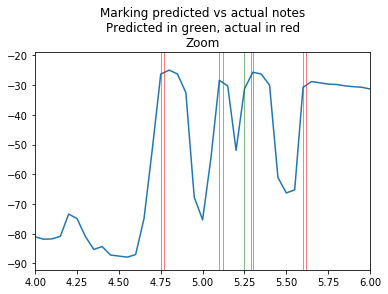

In [55]:
plt.plot(filter_x_axis, filter_volume)
for s in actual_notes:
    plt.axvline(x=s, color='r', linewidth=0.5, linestyle='-', label='actual')
for s in predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted vs actual notes\nPredicted in green, actual in red')

plt.show()

plt.plot(filter_x_axis, filter_volume)
for s in actual_notes:
    plt.axvline(x=s, color='r', linewidth=0.5, linestyle='-', label='actual')
for s in predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted vs actual notes\nPredicted in green, actual in red\nZoom')
plt.xlim(2, 3)
plt.show()

plt.plot(filter_x_axis, filter_volume)
for s in actual_notes:
    plt.axvline(x=s, color='r', linewidth=0.5, linestyle='-', label='actual')
for s in predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted vs actual notes\nPredicted in green, actual in red\nZoom')
plt.xlim(4, 6)
plt.show()

We are very close right now, but there are a couple of times that the program picks up two notes when there should only be one. To remedy this, I am going to say that if two notes are extremely close together, take the average of the two for the prediction

In [56]:
new_predicted_starts = []
for i in range(1, len(predicted_starts)):
    start = predicted_starts[i]
    previous_start = predicted_starts[i-1]
    diff = abs(start - previous_start)
    if diff < 0.1:
        new_start = (start + previous_start)/2
        try:
            new_predicted_starts.pop()
            new_predicted_starts.append(new_start)
        except:
            new_predicted_starts.append(new_start)
    else:
        new_predicted_starts.append(start)

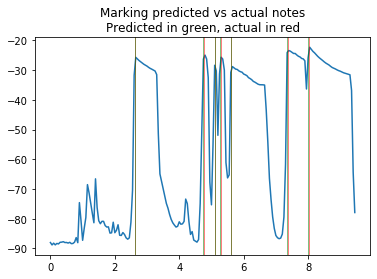

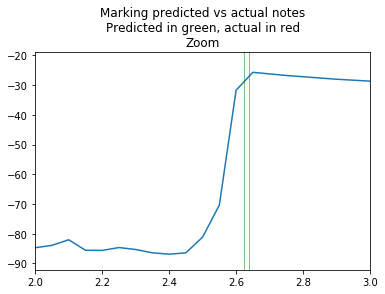

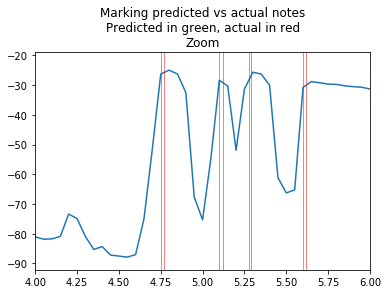

In [57]:
plt.plot(filter_x_axis, filter_volume)
for s in actual_notes:
    plt.axvline(x=s, color='r', linewidth=0.5, linestyle='-', label='actual')
for s in new_predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted vs actual notes\nPredicted in green, actual in red')

plt.show()

plt.plot(filter_x_axis, filter_volume)
for s in actual_notes:
    plt.axvline(x=s, color='r', linewidth=0.5, linestyle='-', label='actual')
for s in new_predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted vs actual notes\nPredicted in green, actual in red\nZoom')
plt.xlim(2, 3)
plt.show()

plt.plot(filter_x_axis, filter_volume)
for s in actual_notes:
    plt.axvline(x=s, color='r', linewidth=0.5, linestyle='-', label='actual')
for s in new_predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted vs actual notes\nPredicted in green, actual in red\nZoom')
plt.xlim(4, 6)
plt.show()

Mission accomplished there

In [58]:
nump_predict = np.array(new_predicted_starts)
nump_actual = np.array(actual_notes)
mse = mean_squared_error(nump_predict, nump_actual)
print('Mean squared error between our predicted start times and actual start times: ' + str(mse))

Mean squared error between our predicted start times and actual start times: 0.0003368571428571539


This is very, very low so we are predicting notes well! Now time for the hard part. Need to convert each note into it's frequencies and try to figure out what note it is

In [59]:
actual_note_values = ['C', 'D', 'C', 'D', 'B', 'B', 'C']

In [60]:
def frequency_spectrum(sample, max_frequency=800):
    """
    Derive frequency spectrum of a pydub.AudioSample
    Returns an array of frequencies and an array of how prevalent that frequency is in the sample
    """
    
    # Convert pydub.AudioSample to raw audio data

    bit_depth = sample.sample_width * 8
    array_type = get_array_type(bit_depth)
    raw_audio_data = array.array(array_type, sample._data)
    n = len(raw_audio_data)
    
    # Compute FFT and frequency value for each index in FFT array
    
    freq_array = np.arange(n) * (float(sample.frame_rate) / n)  # two sides frequency range
    freq_array = freq_array[:(n // 2)]  # one side frequency range
    raw_audio_data = raw_audio_data - np.average(raw_audio_data)  # zero-centering
    
    freq_magnitude = scipy.fft(raw_audio_data) # fft computing and normalization
    freq_magnitude = freq_magnitude[:(n // 2)] # one side
    if max_frequency:
        max_index = int(max_frequency * n / sample.frame_rate) + 1
        freq_array = freq_array[:max_index]
        freq_magnitude = freq_magnitude[:max_index]
    freq_magnitude = abs(freq_magnitude)
    freq_magnitude = freq_magnitude / np.sum(freq_magnitude)
    return freq_array, freq_magnitude

https://stackoverflow.com/questions/32373996/pydub-raw-audio-data

https://stackoverflow.com/questions/53308674/audio-frequencies-in-python

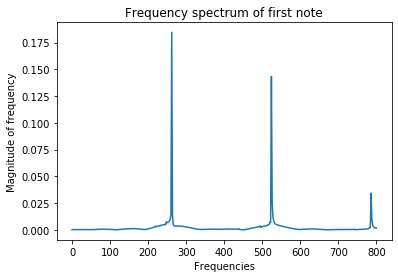

In [61]:
song_to_freq = filter_song[new_predicted_starts[0]*1000:new_predicted_starts[0]*1000+500]
freq_array, freq_magnitude = frequency_spectrum(song_to_freq)
plt.plot(freq_array, freq_magnitude)
plt.title('Frequency spectrum of first note')
plt.xlabel('Frequencies')
plt.ylabel('Magnitude of frequency')
plt.show()

I kinda got lucky with this melody...it happens to start where middle C is on a keyboard (C4)

Need to make a function that will take in frequency and determine what the note is:

In [62]:
from math import log2, pow

A4 = 440
C0 = A4*pow(2, -4.75)
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    
def pitch(freq):
    h = round(12*log2(freq/C0))
    octave = h // 12
    n = h % 12
    return name[n]
pitch(441)

'A'

https://www.johndcook.com/blog/2016/02/10/musical-pitch-notation/

In [63]:
from scipy import signal
peak_indices, props = scipy.signal.find_peaks(freq_magnitude, height=0.015)
for i, peak in enumerate(peak_indices):
    freq = freq_array[peak]
    magnitude = props['peak_heights'][i]
    print('{}hz with magnitude {:.3f}'.format(freq, magnitude))
    


262.0hz with magnitude 0.185
524.0hz with magnitude 0.143
786.0hz with magnitude 0.034


262 is very close to C4, the actual note that is played. 524 corresponds to the overtone of C5, the note an octave higher than C4. 786 corresponds to G5, the perfect fifth of C

In [64]:
freq = freq_array[np.argmax(freq_magnitude)]
note_name = pitch(freq)
note_name

'C'

With the above line, we have correctly predicted the first note of the melody! Now it is time to loop and see if we can predict all of them

In [65]:
experimental_note_values = []
for s in range(len(new_predicted_starts)):
    song_to_freq = filter_song[new_predicted_starts[s]*1000:new_predicted_starts[s]*1000+500]
    freq_array, freq_magnitude = frequency_spectrum(song_to_freq)
    peak_indices, props = scipy.signal.find_peaks(freq_magnitude, height=0.015)
    freq = freq_array[np.argmax(freq_magnitude)]
    note_name = pitch(freq)
    experimental_note_values.append(note_name)

print('actual note values: ')
print(actual_note_values)
print('\nexperimental note values: ')
print(experimental_note_values)

actual note values: 
['C', 'D', 'C', 'D', 'B', 'B', 'C']

experimental note values: 
['C', 'D', 'D', 'D', 'B', 'B', 'C']


So close! Only predicted the third note wrong, but we can zoom in and see what happened there

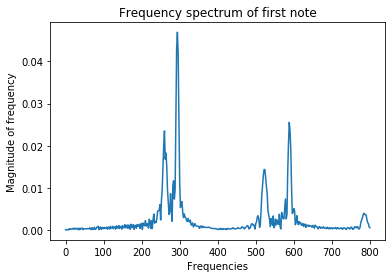

In [66]:
song_to_freq = filter_song[new_predicted_starts[2]*1000:new_predicted_starts[2]*1000+500]
freq_array, freq_magnitude = frequency_spectrum(song_to_freq)
plt.plot(freq_array, freq_magnitude)
plt.title('Frequency spectrum of first note')
plt.xlabel('Frequencies')
plt.ylabel('Magnitude of frequency')
plt.show()

In [67]:
peak_indices, props = scipy.signal.find_peaks(freq_magnitude, height=0.015)
for i, peak in enumerate(peak_indices):
    freq = freq_array[peak]
    magnitude = props['peak_heights'][i]
    print('{}hz with magnitude {:.3f}'.format(freq, magnitude))

260.0hz with magnitude 0.024
264.0hz with magnitude 0.018
294.0hz with magnitude 0.047
588.0hz with magnitude 0.026


In [68]:
freq = freq_array[np.argmax(freq_magnitude)]
note_name = pitch(freq)
note_name

'D'

Looks like the problem is because the previous note (D) bled through to this one since they are played so rapidly back and forth. I think this might not be a problem for the main goal, chord analysis, because playing full chords requires re-strumming of all/most of the strings. Therefore, any strings with overtones still playing from previous chords should be destroyed. I believe with the progress made so far that I am ready to move on to trying to grab notes from chords.

## Chord analysis

In [69]:
path = r"Notes/Audio Files/Chords_03.wav"
wave_obj = sa.WaveObject.from_wave_file(path)
play_obj = wave_obj.play()
play_obj.wait_done()

In [70]:
song = AudioSegment.from_file(path, format='wav')

song = song[2000:]

SEGMENT_MS = 50

volume = [segment.dBFS for segment in song[::SEGMENT_MS]]

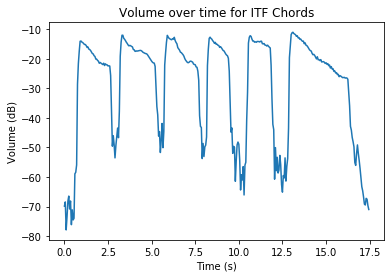

In [71]:
x_axis = np.arange(len(volume)) * (SEGMENT_MS / 1000)
plt.plot(x_axis, volume)
plt.title('Volume over time for ITF Chords')
plt.xlabel('Time (s)')
plt.ylabel('Volume (dB)')
plt.show()

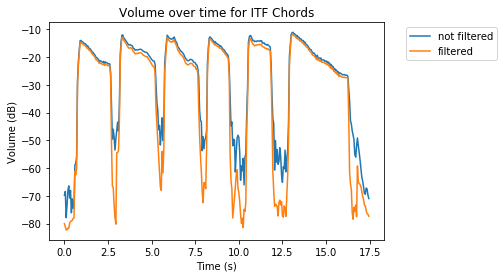

In [72]:
plt.plot(x_axis, volume, label='not filtered')

filter_song = song.high_pass_filter(120)
filter_volume = [segment.dBFS for segment in filter_song[::SEGMENT_MS]]
filter_x_axis = np.arange(len(volume)) * (SEGMENT_MS / 1000)
plt.plot(filter_x_axis, filter_volume, label='filtered')
plt.title('Volume over time for ITF Chords')
plt.xlabel('Time (s)')
plt.ylabel('Volume (dB)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [73]:
VOLUME_THRESHOLD = -20

EDGE_THRESHOLD = 3

predicted_starts = []
for i in range(1, len(volume)):
    if(volume[i] > VOLUME_THRESHOLD and volume[i] - volume[i-1] > EDGE_THRESHOLD):
        predicted_note = (i * SEGMENT_MS)/1000
        predicted_starts.append(predicted_note)

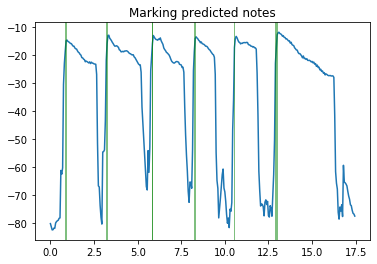

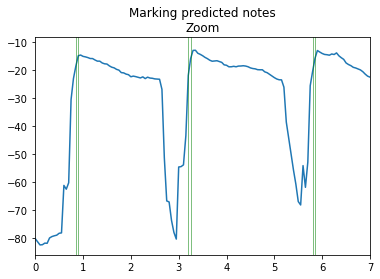

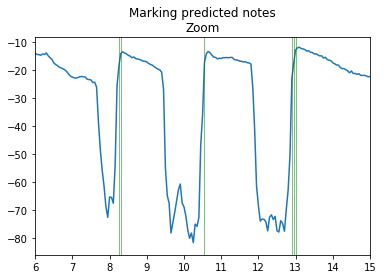

In [74]:
plt.plot(filter_x_axis, filter_volume)
for s in predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted notes')

plt.show()

plt.plot(filter_x_axis, filter_volume)
for s in predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted notes\nZoom')
plt.xlim(0, 7)
plt.show()

plt.plot(filter_x_axis, filter_volume)
for s in predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted notes\nZoom')
plt.xlim(6, 15)
plt.show()

In [75]:
new_predicted_starts = []
for i in range(1, len(predicted_starts)):
    start = predicted_starts[i]
    previous_start = predicted_starts[i-1]
    diff = abs(start - previous_start)
    if diff < 0.1:
        new_start = (start + previous_start)/2
        try:
            new_predicted_starts.pop()
            new_predicted_starts.append(new_start)
        except:
            new_predicted_starts.append(new_start)
    else:
        new_predicted_starts.append(start)

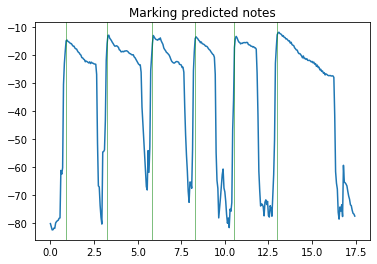

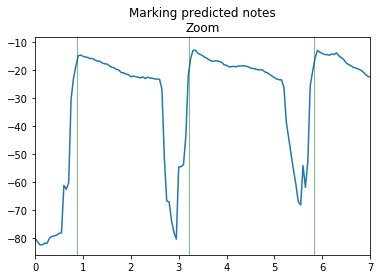

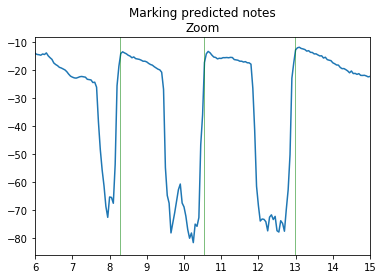

In [76]:
plt.plot(filter_x_axis, filter_volume)
for s in new_predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted notes')

plt.show()

plt.plot(filter_x_axis, filter_volume)
for s in new_predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted notes\nZoom')
plt.xlim(0, 7)
plt.show()

plt.plot(filter_x_axis, filter_volume)
for s in new_predicted_starts:
    plt.axvline(x=s, color='g', linewidth=0.5, linestyle='-', label='prediction')
plt.title('Marking predicted notes\nZoom')
plt.xlim(6, 15)
plt.show()

In [77]:
actual_chord_values = ['C', 'E', 'F', 'C', 'G', 'C']

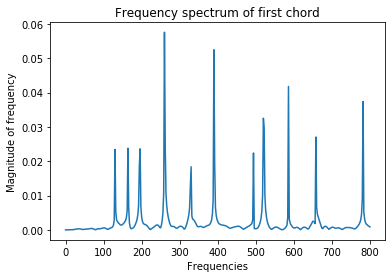

In [78]:
song_to_freq = filter_song[new_predicted_starts[0]*1000:new_predicted_starts[0]*1000+500]
freq_array, freq_magnitude = frequency_spectrum(song_to_freq)
plt.plot(freq_array, freq_magnitude)
plt.title('Frequency spectrum of first chord')
plt.xlabel('Frequencies')
plt.ylabel('Magnitude of frequency')
plt.show()

In [79]:
peak_indices, props = scipy.signal.find_peaks(freq_magnitude, height=0.015)
for i, peak in enumerate(peak_indices):
    freq = freq_array[peak]
    magnitude = props['peak_heights'][i]
    print('{}hz with magnitude {:.3f}'.format(freq, magnitude))

130.0hz with magnitude 0.023
164.0hz with magnitude 0.024
196.0hz with magnitude 0.024
260.0hz with magnitude 0.058
330.0hz with magnitude 0.018
390.0hz with magnitude 0.052
494.0hz with magnitude 0.022
520.0hz with magnitude 0.033
586.0hz with magnitude 0.042
658.0hz with magnitude 0.027
782.0hz with magnitude 0.037


In [80]:
freq = freq_array[np.argmax(freq_magnitude)]
chord_name = pitch(freq)
chord_name

'C'

In [81]:
experimental_chord_values = []
#Edited start and stop times to take into account for strumming (the full chord isn't ringing immediately at the chord
#start, unlike a note)
for s in range(len(new_predicted_starts)):
    song_to_freq = filter_song[new_predicted_starts[s]*1000+100:new_predicted_starts[s]*1000+600]
    freq_array, freq_magnitude = frequency_spectrum(song_to_freq)
    peak_indices, props = scipy.signal.find_peaks(freq_magnitude, height=0.015)
    freq = freq_array[np.argmax(freq_magnitude)]
    note_name = pitch(freq)
    experimental_chord_values.append(note_name)

print('actual chord values: ')
print(actual_chord_values)
print('\nexperimental chord values: ')
print(experimental_chord_values)

actual chord values: 
['C', 'E', 'F', 'C', 'G', 'C']

experimental chord values: 
['C', 'G#', 'A', 'C', 'G', 'C']


Not quite as good as the note values but still pretty good. Getting confused on E and F (second and third chords) at the moment. Maybe I can make the algorithm to detect what chord is what a little more sophisticated

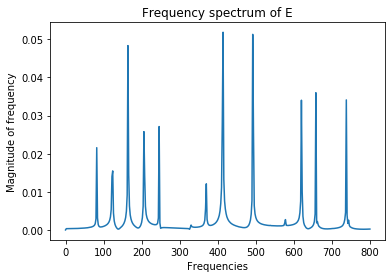

In [82]:
#Looking at E
song_to_freq = filter_song[new_predicted_starts[1]*1000+100:new_predicted_starts[1]*1000+600]
freq_array, freq_magnitude = frequency_spectrum(song_to_freq)
plt.plot(freq_array, freq_magnitude)
plt.title('Frequency spectrum of E')
plt.xlabel('Frequencies')
plt.ylabel('Magnitude of frequency')
plt.show()

In [83]:
peak_indices, props = scipy.signal.find_peaks(freq_magnitude, height=0.015)
for i, peak in enumerate(peak_indices):
    freq = freq_array[peak]
    magnitude = props['peak_heights'][i]
    print('{}hz with magnitude {:.3f}. Note = {}'.format(freq, magnitude, pitch(freq)))

82.0hz with magnitude 0.022. Note = E
124.0hz with magnitude 0.015. Note = B
164.0hz with magnitude 0.048. Note = E
206.0hz with magnitude 0.026. Note = G#
246.0hz with magnitude 0.027. Note = B
414.0hz with magnitude 0.052. Note = G#
492.0hz with magnitude 0.051. Note = B
620.0hz with magnitude 0.034. Note = D#
658.0hz with magnitude 0.036. Note = E
738.0hz with magnitude 0.034. Note = F#


In [84]:
freq = freq_array[np.argmax(freq_magnitude)]
note_name = pitch(freq)
note_name

'G#'

The frequency spectrum tells us that E's total magnitude is 0.106. G#'s total magnitude is .078. B's total magnitude is .093. D#'s total magnitude is .034. And F#'s total magnitude is .034. E's total magnitude is the highest, but our current algorithm only looks at the maximum individual peaks. I think I need to sum up all notes to grab total magnitude and maybe that will fix the problem

These notes mostly make sense, though, which is good. E is the tonic, G# is the major third, B is the perfect fifth, and D# is the major 7th. D# ringing out is a little strange as that is the major second, but I guess it is not too strange

In [85]:
import operator
experimental_chord_values = []
for s in range(len(new_predicted_starts)):
    song_to_freq = filter_song[new_predicted_starts[s]*1000+100:new_predicted_starts[s]*1000+600]
    freq_array, freq_magnitude = frequency_spectrum(song_to_freq)
    peak_indices, props = scipy.signal.find_peaks(freq_magnitude, height=0.015)
    
    pitches = {}
    for i, peak in enumerate(peak_indices):
        freq = freq_array[peak]
        magnitude = props['peak_heights'][i]
        current_pitch = pitch(freq)
        if current_pitch in pitches:
            pitches[current_pitch] += magnitude
        else:
            pitches[current_pitch] = magnitude
    
    chord_name = max(pitches.items(), key=operator.itemgetter(1))[0]
    experimental_chord_values.append(chord_name)

print('actual chord values: ')
print(actual_chord_values)
print('\nexperimental chord values: ')
print(experimental_chord_values)

actual chord values: 
['C', 'E', 'F', 'C', 'G', 'C']

experimental chord values: 
['C', 'E', 'F', 'C', 'G', 'C']


It worked!!!